### 1. 데이터 수집
- Dataset : Yahoo Finance (https://finance.yahoo.com)
    - 주식 종목: 삼성 전자 
    - 데이터 내용: 5년치 주식 가격 데이터

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

In [2]:
data = pd.read_csv('005930.KS.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016.8.29,32040,32800,31940,32800,28289.05664,8925750
1,2016.8.30,32940,33420,32660,32900,28375.30078,7849600
2,2016.8.31,32820,32820,32220,32400,27944.06836,20532200
3,2016.9.1,31660,31760,31260,31740,27374.83789,18790150
4,2016.9.2,31900,32260,31760,31940,27547.33203,8153000


### 2. 중간값 얻기

In [3]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

### 3. 위도우 생성

In [4]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [5]:
for r in result:
    if r.any() == None :
        print('null')

### 4. 데이터 정규화

In [6]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1055, 50, 1), (117, 50, 1))

### 5. 모델 생성

In [7]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


### 6. 모델 학습

In [8]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Epoch 1/20
106/106 [==============================] - 28s 34ms/step - loss: 0.0031 - val_loss: 3.6012e-04
Epoch 2/20
106/106 [==============================] - 3s 28ms/step - loss: 0.0010 - val_loss: 6.0969e-04
Epoch 3/20
106/106 [==============================] - 4s 35ms/step - loss: 8.1996e-04 - val_loss: 2.5812e-04
Epoch 4/20
106/106 [==============================] - 3s 33ms/step - loss: 5.4352e-04 - val_loss: 2.1035e-04
Epoch 5/20
106/106 [==============================] - 4s 37ms/step - loss: 5.2217e-04 - val_loss: 2.2998e-04
Epoch 6/20
106/106 [==============================] - 4s 38ms/step - loss: 4.2760e-04 - val_loss: 3.2427e-04
Epoch 7/20
106/106 [==============================] - 4s 35ms/step - loss: 4.1952e-04 - val_loss: 3.3208e-04
Epoch 8/20
106/106 [==============================] - 4s 38ms/step - loss: 3.8742e-04 - val_loss: 1.8160e-04
Epoch 9/20
106/106 [==============================] - 4s 38ms/step - loss: 3.4750e-04 - val_loss: 1.1653e-04
Epoch 10/20
106/106 [=====

### 7. 예측

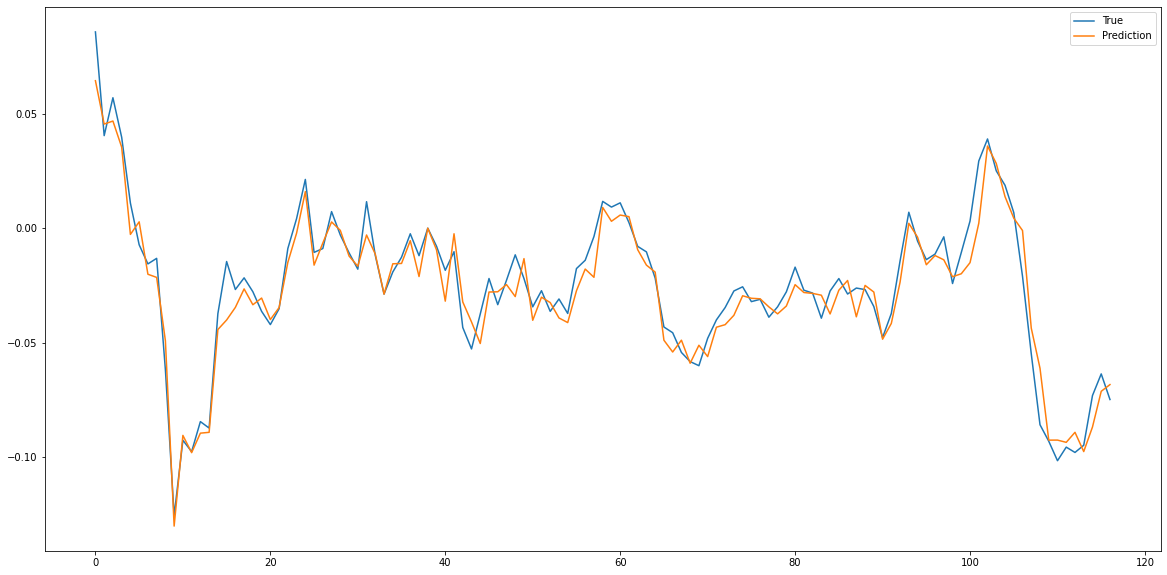

In [9]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

참고: https://github.com/kairess/stock_crypto_price_prediction